In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

# 고객 당 한줄로 표현해야 feature로 쓸 수 있다.!!!!!!!!!!

In [3]:
tr = pd.read_csv('../data/train_transactions.csv', encoding='cp949')
# tr_test = pd.read_csv('../data/test_transactions.csv', encoding='cp949')
# y_train = pd.read_csv('../data/y_train.csv').gender
# IDtest = tr_test.cust_id.unique()

# tr_train.head()

# Feature Generation
새로 만든 feature와 병합할 고객 ID로만 이루어진 데이터프레임을 만든다.

In [4]:
features = pd.DataFrame({'cust_id':tr.cust_id.unique()})

In [5]:
features

,cust_id
0,0
1,1
2,2
3,3
4,4
...,...
3495,3495
3496,3496
3497,3497
3498,3498


# Numeric Features

[파생변수 1-4] 총구매액, 구매건수, 평균구매액, 최대구매액

In [ ]:
tr.groupby('cust_id')['amount'].agg({
    ('총구매액', [])
})

In [20]:
f = tr.groupby('cust_id')['amount'].agg([{}
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()
features = features.merge(f, how='left'); features

<>:1: SyntaxWarning: 'dict' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'dict' object is not callable; perhaps you missed a comma?
/var/folders/jx/rdhgw4n94cvb3tl_p0k9_4br0000gn/T/ipykernel_4594/3357377231.py:1: SyntaxWarning: 'dict' object is not callable; perhaps you missed a comma?
  f = tr.groupby('cust_id')['amount'].agg([{}
/var/folders/jx/rdhgw4n94cvb3tl_p0k9_4br0000gn/T/ipykernel_4594/3357377231.py:1: SyntaxWarning: 'dict' object is not callable; perhaps you missed a comma?
  f = tr.groupby('cust_id')['amount'].agg([{}
/var/folders/jx/rdhgw4n94cvb3tl_p0k9_4br0000gn/T/ipykernel_4594/3357377231.py:1: SyntaxWarning: 'dict' object is not callable; perhaps you missed a comma?
  f = tr.groupby('cust_id')['amount'].agg([{}
/var/folders/jx/rdhgw4n94cvb3tl_p0k9_4br0000gn/T/ipykernel_4594/3357377231.py:1: SyntaxWarning: 'dict' object is not callable; perhaps you missed a comma?
  f = tr.groupby('cust_id')['amount'].agg([{}
/var/folders/jx/rdhgw4n94cvb3tl_p0k9

TypeError: 'dict' object is not callable

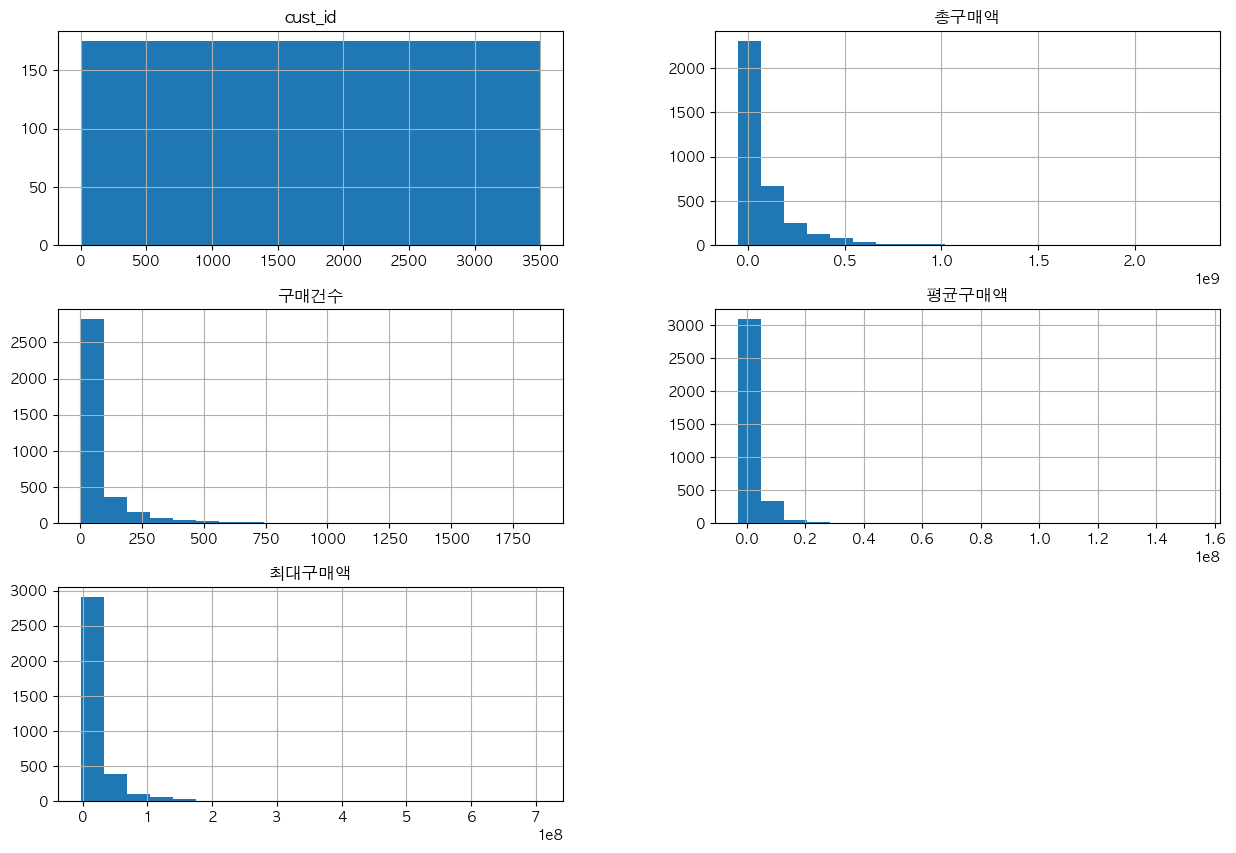

In [7]:
# histogram
f.hist(bins=20, figsize=(15,10))
plt.show()

[파생변수 5-7] 구매상품종류(goods_id, gds_grp_nm, gds_grp_mclas_nm 각각)

In [8]:
f = tr.groupby('cust_id').agg({
    'goods_id': [('구매상품종류1', lambda x: x.nunique())],
    'gds_grp_nm': [('구매상품종류2', lambda x: x.nunique())],
    'gds_grp_mclas_nm': [('구매상품종류3', lambda x: x.nunique())]
})

f.columns = f.columns.droplevel()  # 동일한 코드: f.columns = [j for _, j in f.columns]
f=f.reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3
0,0,68282840,74,922741.00000,11264000,35,28,17
1,1,2136000,3,712000.00000,2136000,2,2,2
2,2,3197000,4,799250.00000,1639000,1,2,2
3,3,16077620,44,365400.00000,4935000,24,20,13
4,4,29050000,3,9683333.00000,24000000,2,3,3
...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2
3496,3496,29628600,13,2279123.00000,7200000,9,7,5
3497,3497,75000,1,75000.00000,75000,1,1,1
3498,3498,1875000,2,937500.00000,1000000,1,1,1


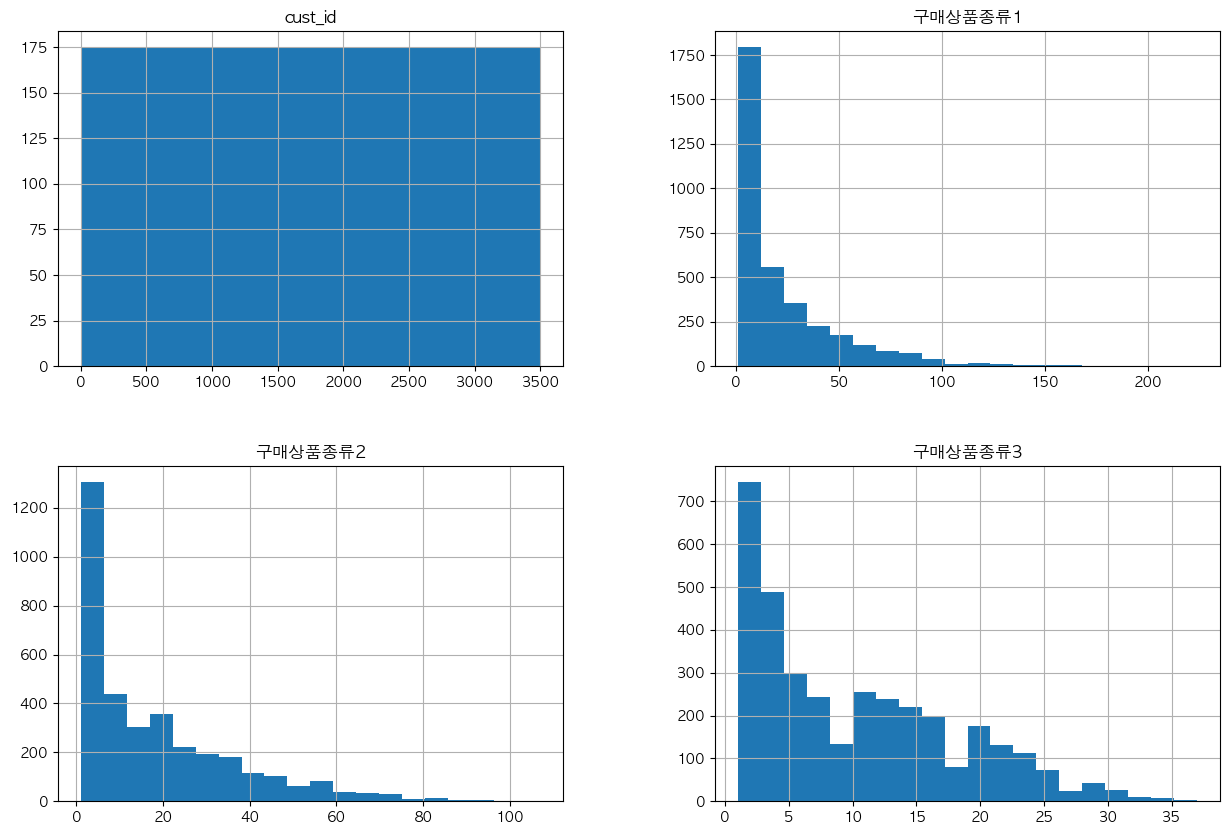

In [9]:
# histogram
f.hist(bins=20, figsize=(15,10))
plt.show()

[파생변수 8-14] 내점일수, 구매주기, 주말방문비율, 계절별 구매비율(Spring(3-5)/Summer(6-8)/Fall(9-11)/Winter(12-2))

In [5]:
tr['tran_date']

0         2007-01-19 00:00:00
1         2007-03-30 00:00:00
2         2007-03-30 00:00:00
3         2007-03-30 00:00:00
4         2007-03-30 00:00:00
                 ...         
231999    2007-12-17 00:00:00
232000    2007-12-23 00:00:00
232001    2007-12-23 00:00:00
232002    2007-12-27 00:00:00
232003    2007-12-27 00:00:00
Name: tran_date, Length: 232004, dtype: object

In [10]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('내점일수',lambda x: x.str[:10].nunique()),
    ('구매주기', lambda x: int((x.astype('datetime64').max() - x.astype('datetime64').min()).days / x.str[:10].nunique())),
    ('주말방문비율', lambda x: np.mean(pd.to_datetime(x).dt.dayofweek>4)),
    ('봄-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([1,2,12])))
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000


[파생변수 15-16] 환불금액, 환불건수

In [11]:
f = tr[tr.amount < 0].groupby('cust_id')['amount'].agg([
    ('환불금액', lambda x: x.sum() * -1),
    ('환불건수', np.size)
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN


[파생변수 17-18] 내점 당 구매액, 구매건수

In [12]:
# 내점 당 구매액 = 총구매액 / 내점일수
visits = tr.groupby('cust_id')['tran_date'].agg(lambda x: x.nunique())
f = (tr.groupby('cust_id')['amount'].sum() / visits).reset_index().rename(columns={0 : "내점당구매액"})
features = features.merge(f, how='left'); features
f = (tr.groupby('cust_id')['amount'].size() / visits).reset_index().rename(columns={0 : "내점당구매건수"})
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000


In [13]:
visits

cust_id
0       19
1        2
2        2
3       18
4        2
        ..
3495     1
3496     8
3497     1
3498     2
3499    38
Name: tran_date, Length: 3500, dtype: int64

[파생변수 19-24] 최근 3개월, 6개월, 12개월 구매금액 및 구매건수

In [14]:
# pd.to_datetime(), pd.offsets.MonthBegin(3)
for m in [3,6,12]:
    start = str(pd.to_datetime(tr.tran_date.max()) - pd.offsets.MonthBegin(m))
    f = tr.query('tran_date >= @start').groupby('cust_id')['amount'].agg([
        (f'최근{m}개월_구매금액', np.sum), 
        (f'최근{m}개월_구매건수', np.size)
    ]).reset_index()
    display(f)
    features = features.merge(f, how='left'); features

,cust_id,최근3개월_구매금액,최근3개월_구매건수
0,0,29084140,27
1,1,2136000,3
2,3,549620,4
3,4,27000000,2
4,7,140818200,36
...,...,...,...
2439,3492,9154000,1
2440,3493,42697460,101
2441,3494,82800000,2
2442,3496,12028000,7


,cust_id,최근6개월_구매금액,최근6개월_구매건수
0,0,42601240,61
1,1,2136000,3
2,3,1284060,11
3,4,27000000,2
4,6,2250000,2
...,...,...,...
2778,3492,9154000,1
2779,3493,59972640,140
2780,3494,82800000,2
2781,3496,19224000,11


,cust_id,최근12개월_구매금액,최근12개월_구매건수
0,0,68282840,74
1,1,2136000,3
2,2,3197000,4
3,3,16077620,44
4,4,29050000,3
...,...,...,...
3495,3495,3175200,2
3496,3496,29628600,13
3497,3497,75000,1
3498,3498,1875000,2


# Categorical Features

[파생변수 25] 주구매 상품: 가장 많이 구매한 상품(gds_grp_mclas_nm)

In [10]:
tr['gds_grp_mclas_nm'].value_counts().index

Index(['기타', '농산물', '가공식품', '축산가공', '수산품', '화장품', '디자이너', '시티웨어', '일용잡화', '육류',
       '차/커피', '섬유잡화', '젓갈/반찬', '명품', '캐주얼', '골프', '스포츠', '주류', '아동', '구두',
       '란제리/내의', '건강식품', '주방용품', '남성 캐주얼', '모피/피혁', '피혁잡화', '트래디셔널', '셔츠',
       '침구/수예', '생활잡화', '주방가전', '커리어', '남성정장', '식기', '액세서리', '대형가전', '가구',
       '남성 트랜디', '소형가전', '통신/컴퓨터', '보석', '기타의류', '준보석/시계', '악기', '교복', '문구/팬시',
       '웨딩', '전자/전기', '멀티(아울렛)'],
      dtype='object')

In [15]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([
    ('주구매상품', lambda x: x.value_counts().index[0])
]).reset_index()
# features = features.merge(f, how='left'); features

In [16]:
f

,cust_id,주구매상품
0,0,기타
1,1,스포츠
2,2,남성 캐주얼
3,3,기타
4,4,화장품
...,...,...
3495,3495,골프
3496,3496,시티웨어
3497,3497,주방용품
3498,3498,화장품


<AxesSubplot:xlabel='count', ylabel='주구매상품'>

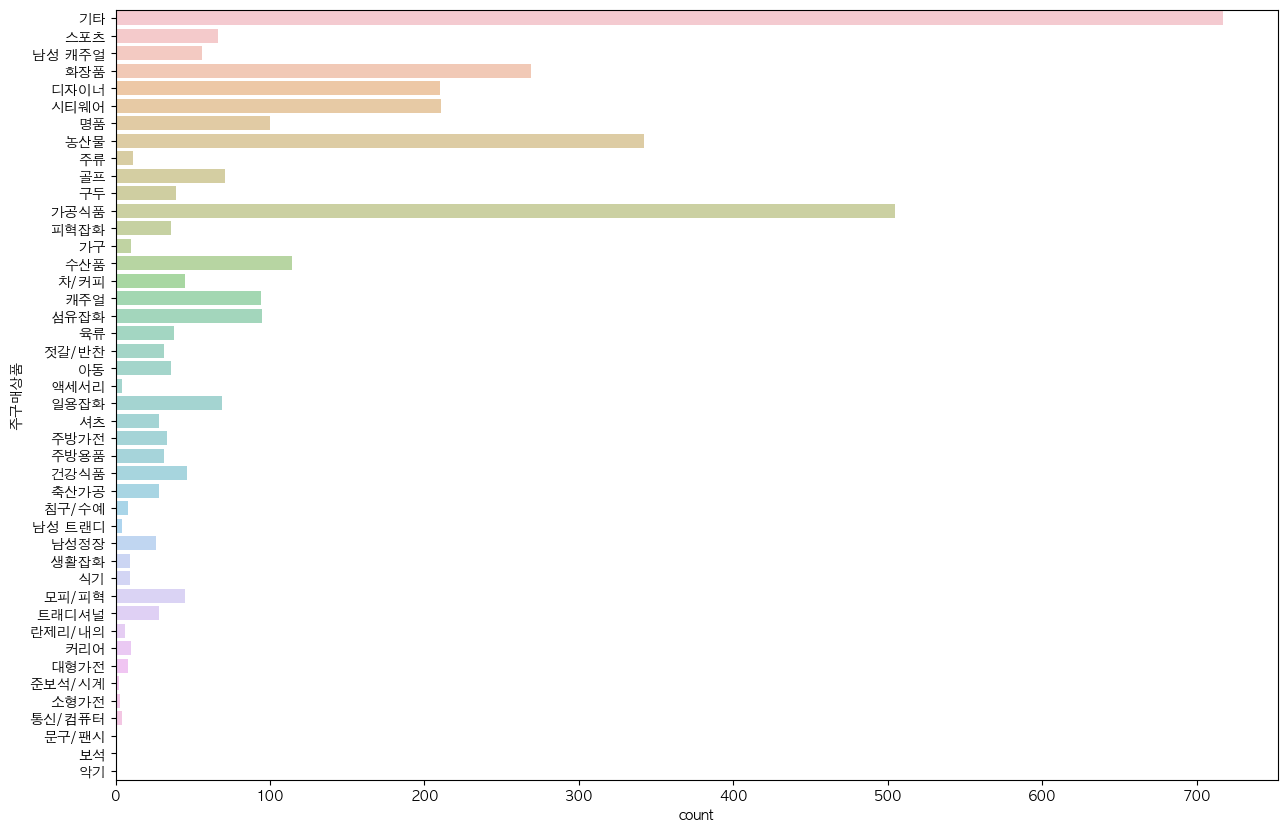

In [16]:
# 범주형 속성 값의 빈도 출력
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y='주구매상품', data=f, alpha=0.5)

[파생변수 26] 주구매 지점

In [17]:
f = tr.groupby('cust_id')['store_nm'].agg([
    ('주구매지점', lambda x: x.value_counts().index[0])
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점


[파생변수 27-35] 추가로 새로운 파생변수를 제안하고 구현해야 함! 아래는 예시.

- 구매추세 패턴
- 가격선호도 (예: 고가상품구매율)
- 시즌 선호도(어떤 시즌을 가장 선호하는지)
- 휴면(또는 이탈) 여부
- Top-10 베스트 셀러(gds_grp_mclas_nm)에 대한 구매 금액/건수/여부
- 상품별 구매순서
- 주구매 요일

In [18]:
tr

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount,temp
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000,NaN
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000,70.00000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000,0.00000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000,0.00000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000,0.00000
...,...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000,0.00000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000,6.00000
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800,0.00000
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000,4.00000


In [17]:
tr['temp'] = pd.to_datetime(tr['tran_date']).diff().dt.days
features['구매추세 패턴'] = tr.groupby('cust_id').temp.std()
features

,cust_id,구매추세 패턴
0,0,12.07197
1,1,37.26929
2,2,145.33639
3,3,13.64120
4,4,185.20259
...,...,...
3495,3495,86.97413
3496,3496,62.72978
3497,3497,NaN
3498,3498,45.96194


14번 [파생변수 28] 가격선호도 (예: 고가상품구매율)

- 상위 10% 이내 금액의 상품을 고가로 선정

In [32]:
a = sorted(tr.amount.unique().tolist(),reverse=True)
int(len(sorted(tr.amount.unique().tolist(),reverse=True))*0.1)

2678

In [34]:
a[2678]

16112000

In [21]:
from scipy.stats import norm
x = tr.amount.mean()
sd = tr.amount.std()
cnt = tr.amount.count()
value = norm.ppf(0.9, x, sd)
f = tr[tr.amount > value].groupby('cust_id')['amount'].agg([
    ('고가상품구매건수', np.size)
]).reset_index()
features = features.merge(f, how='left')
features
features['고가상품구매율'] = features['고가상품구매건수'] / features['구매건수'].astype(float)
features

KeyError: '구매건수'

[파생변수 30] 휴면(또는 이탈) 여부

마지막 방문일로부터 2007년 12월 31일까지 경과한 시간이 구매주기보다 길어지면 휴면이라고 판단

In [20]:
a = (pd.to_datetime('2007-12-31') - pd.to_datetime(tr.groupby('cust_id')['tran_date'].max())
features["휴면 여부"] = a.astype('timedelta64[D]').astype('int') - features["구매주기"]).apply(lambda x: "휴면" if x>0 else "정상")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1.00000,0.01351,정상
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,NaN,NaN,휴면
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,NaN,NaN,휴면
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,NaN,NaN,휴면
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1.00000,0.33333,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,NaN,NaN,휴면
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,NaN,NaN,정상
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,NaN,NaN,휴면
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,NaN,NaN,휴면


**[파생변수 31-33]** Top-10 베스트 셀러(gds_grp_mclas_nm)에 대한 구매 금액/건수/여부

SyntaxError: invalid syntax (2599229814.py, line 1)

In [21]:
top10list = tr['gds_grp_mclas_nm'].value_counts()[:10].index.tolist()
f = tr[tr['gds_grp_mclas_nm'].isin(top10list)]
f = f.groupby('cust_id')['amount'].agg([
    ('Top-10 구매금액',np.sum), 
    ('Top-10 구매건수', np.size), 
]).reset_index()
features = features.merge(f, how='left');
features['Top-10 구매여부'] = features['Top-10 구매건수'].apply(lambda x: "구매" if x>0 else "비구매")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1.00000,0.01351,정상,45689940.00000,51.00000,구매
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,NaN,NaN,휴면,NaN,NaN,비구매
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,NaN,NaN,휴면,139000.00000,2.00000,구매
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,NaN,NaN,휴면,4411020.00000,36.00000,구매
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1.00000,0.33333,정상,5050000.00000,2.00000,구매
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,NaN,NaN,휴면,132300.00000,1.00000,구매
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,NaN,NaN,정상,14774000.00000,10.00000,구매
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,NaN,NaN,휴면,NaN,NaN,비구매
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,NaN,NaN,휴면,1875000.00000,2.00000,구매


 [파생변수 35] 주구매 요일

In [22]:
tr['weekday'] = pd.to_datetime(tr['tran_date']).dt.dayofweek
f = tr.groupby('cust_id')['weekday'].agg([
    ('주구매 요일', lambda x: x.value_counts().index[0]),
])
days = {0:'월', 1: '화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
features['주구매 요일'] = f['주구매 요일'].map(days)
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1.00000,0.01351,정상,45689940.00000,51.00000,구매,토
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,NaN,NaN,휴면,NaN,NaN,비구매,목
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,NaN,NaN,휴면,139000.00000,2.00000,구매,월
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,NaN,NaN,휴면,4411020.00000,36.00000,구매,화
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1.00000,0.33333,정상,5050000.00000,2.00000,구매,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,NaN,NaN,휴면,132300.00000,1.00000,구매,일
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,NaN,NaN,정상,14774000.00000,10.00000,구매,토
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,NaN,NaN,휴면,NaN,NaN,비구매,화
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,NaN,NaN,휴면,1875000.00000,2.00000,구매,화


[파생변수 27-28] 고가상품구매건수, 고가상품구매율(가격선호도)

- 고가상품구매건수: 전체 평균 금액 이상 구매한 건수
- 고가상품구매율: 구매건수 대비 고가상품구매건수 비율

In [23]:
m = tr.amount.mean()

f = tr[tr.amount >= m].groupby('cust_id')['amount'].agg([
    ('고가상품구매건수', np.size)
]).reset_index()

features = features.merge(f, how='left')

features['고가상품구매율'] = features['고가상품구매건수'].fillna(0) / features['구매건수']
features['고가상품구매건수'] = features['고가상품구매건수'].fillna(0).astype(int)

features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화


<br><font color='blue'>
**[파생변수 29-31]** SS-구매비율, FW-구매비율, 시즌 선호도
- SS-구매비율: 봄/여름에 구매하는 비율, 결측치는 0
- FW-구매비율: 가을/겨울에 구매하는 비율, 결측치는 0
- 시즌 선호도: 봄/여름에 구매하는 비율이 0.5 이상이면 'SS', 그렇지 않으면 'FW'

In [24]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('SS-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([3,4,5,6,7,8]))),
    ('FW-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([1,2,9,10,11,12])))
]).reset_index()

features = features.merge(f, how='left'); features

features['SS-구매비율'].fillna(0, inplace=True)
features['FW-구매비율'].fillna(0, inplace=True)

features['시즌_선호도'] = 'SS'
features.loc[features['FW-구매비율'] > 0.5, '시즌_선호도'] = 'FW'

features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS


<br><font color='blue'>
**[파생변수 32-33]** 최근 3개월, 6개월 휴면(또는 이탈) 여부
- 최근 3개월, 6개월 이내 구매건수가 없으면 휴면(또는 이탈)로 판단
- 휴면(또는 이탈)이면 1, 아니면 0

In [25]:
for m in [3,6]:
    features[f'최근{m}개월_휴면'] = 0
    features.loc[features[f'최근{m}개월_구매건수'].isnull(), f'최근{m}개월_휴면'] = 1

features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1


<br><font color='blue'>
**[파생변수 35]** 평일방문비율

In [26]:
features['평일방문비율'] = 1 - features['주말방문비율']

features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000


1번 [파생변수 28-31] 분기별(1분기, 2분기, 3분기, 4분기) 구매 비율

In [27]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('1분기-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([1,2,3]))),
    ('2분기-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([4,5,6]))),
    ('3분기-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([7,8,9]))),
    ('4분기-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([10,11,12])))
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000


[파생변수 35-36] 최소 구매액

In [28]:
f = tr.groupby('cust_id')['amount'].agg([
    ('최소구매액(반품포함)', 'min')]).reset_index()
features.append(f)
features = features.merge(f, how='left'); features

/var/folders/jx/rdhgw4n94cvb3tl_p0k9_4br0000gn/T/ipykernel_49735/701636246.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features.append(f)


,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함)
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000


평균구매상품수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [29]:
df = tr[tr.amount > 0].groupby(["cust_id", "goods_id"])["amount"].agg([("상품별구매수량", "count")]).reset_index()
new_feature = df.groupby(["cust_id"])["상품별구매수량"].agg([("평균구매상품수", "mean")])
new_feature = new_feature.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000


**[파생변수]** 일평균구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [30]:
df = tr[tr.amount > 0].groupby(["cust_id", "tran_date"])["amount"].agg([("일별합계구매액", "sum")])
new_feature = df.groupby(["cust_id"])["일별합계구매액"].agg([("일평균구매액", "mean")])
new_feature = new_feature.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000


**[파생변수]** 일평균구매건수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [31]:
df = tr[tr.amount > 0].groupby(["cust_id", "tran_date"])["cust_id"].agg([("일별합계구매건", "count")])
new_feature = df.groupby(["cust_id"])["일별합계구매건"].agg([("일평균구매건 ", "mean")])
new_feature = new_feature.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000,1.00000


**[파생변수]** 최소구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [32]:
df = tr[tr.amount > 0].groupby("cust_id")["amount"].agg([("최소구매액", "min")])
new_feature = df.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000,1.00000,875000.00000


**[파생변수]** 중간구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [33]:
df = tr[tr.amount > 0].groupby("cust_id")["amount"].agg([("중간구매액", "median")])
new_feature = df.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000,1.00000,875000.00000,937500.00000


**[파생변수]** 주거래지점의 거래수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [34]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["tmp"] = np.ones(len(tr_tmp))
main_tran_store = pd.pivot_table(tr_tmp, values="tmp", index="cust_id", columns="store_nm", aggfunc=sum, fill_value=0)
new_feature = main_tran_store.max(axis=1)
new_feature = new_feature.reset_index()
new_feature = new_feature.rename(columns={0 : "주거래지점거래수"})
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000,1.00000,875000.00000,937500.00000,2.00000


**[파생변수]** 월평균 구매액 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [35]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_mean_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc=np.mean, fill_value=np.NaN)
new_feature = monthly_mean_tran.mean(axis=1)
new_feature = new_feature.reset_index()
new_feature = new_feature.rename(columns={0: "월평균구매금액"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000,1.00000,875000.00000,937500.00000,2.00000,937500.00000


**[파생변수]** 월평균 구매건수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [36]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_mean_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc="count", fill_value=np.NaN)
new_feature = monthly_mean_tran.mean(axis=1); new_feature
new_feature = new_feature.reset_index()
new_feature = new_feature.rename(columns={0: "월평균구매건수"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000,0.50000,0.50000,0.00000,0.00000,875000,2.00000,937500.00000,1.00000,875000.

**[파생변수]** 거래 개월수 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [37]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc=np.sum, fill_value=np.NaN)
new_feature = monthly_tran.count(axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "거래개월수"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000,1.00000,1.00000
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96194,0,0.00000,휴면,1875000.00000,2.00000,구매,화,0.50000,0.50000,SS,1,1,1.00000

**[파생변수]** 최고 구매월 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [38]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc=np.sum, fill_value=np.NaN)
new_feature = monthly_tran.idxmax(axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "최고구매월"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000,1.00000,1.00000,2007-01
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.50000,NaN,NaN,937500.00000,1.00000,NaN,NaN,NaN,NaN,1875000,2,화장품,본 점,45.96

**[파생변수]** 최다 구매월 : 금액이 (-)인 경우는 반품한 것으로 거래 내역에서 제외

In [39]:
tr_tmp = tr[tr.amount > 0].copy()
tr_tmp["year_month"] = tr_tmp.tran_date.str[:7]
monthly_tran = pd.pivot_table(tr_tmp, values="amount", index="cust_id", columns="year_month", aggfunc="count", fill_value=np.NaN)
new_feature = monthly_tran.idxmax(axis=1); new_feature
new_feature = new_feature.reset_index(); new_feature
new_feature = new_feature.rename(columns={0: "최다구매월"}); new_feature
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000,1.00000,1.00000,2007-01,2007-01
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.00000,0.50000,0.00000,0.00000,0.

**[파생변수]** 지점단골성향도(1개의 지점만 이용)

In [40]:
df = tr.groupby("cust_id")["store_nm"].agg([('지점단골성향도', 'nunique')]); df
new_feature = df.reset_index()
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000,1.00000,1.00000,2007-01,2007-01,1
3498,3498,1875000,2,937500.00000,1000000,1,1,1,2,39,0.0000

**[파생변수]** 브랜드단골성향도(n개의 상품군에서 m개의 브랜드만 이용)

In [41]:
df_mclass = tr.groupby("cust_id")["gds_grp_mclas_nm"].agg([('상품군', 'nunique')]); df_mclass
df_brand = tr.groupby("cust_id")["gds_grp_nm"].agg([('브랜드', 'nunique')]); df_brand
df_mclass = df_mclass.reset_index()
df_brand = df_brand.reset_index()
df = pd.merge(df_mclass, df_brand, on="cust_id"); df
new_feature["브랜드단골성향도"] = df["브랜드"] / df["상품군"]; df
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1,1.40000
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.00000,75000.00000,75000.00000,1.00000,75000.00000,1.00000,1.00000,2007-01

**[파생변수]**  구매상품군다양성

In [42]:
n = tr.gds_grp_nm.nunique()
new_feature = tr.groupby("cust_id")["gds_grp_nm"].agg([("구매상품군다양성", lambda x: len(x.unique()) / n)]); new_feature
new_feature = new_feature.reset_index(); new_feature 
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1,1.40000,0.02160
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,75000,1.00000,75000.00000,1.0000

**[파생변수]**  구매브랜드다양성

In [43]:
n = tr.gds_grp_mclas_nm.nunique()
new_feature = tr.groupby("cust_id")["gds_grp_mclas_nm"].agg([("구매브랜드다양성", lambda x: len(x.unique()) / n)]); new_feature
new_feature = new_feature.reset_index(); new_feature 
features = features.merge(new_feature, how="left")
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1,1.40000,0.02160,0.10204
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.00000,1.00000,FW,1,1,1.0

**[구매지점수]** 최대 27개

In [44]:
# 구매지점수 27
f = tr.groupby('cust_id').agg({'store_nm': [('구매지점수', lambda x: x.nunique())]})
f.columns = f.columns.droplevel()
f=f.reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1,1.40000,0.02160,0.10204,1
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.00000,휴면,NaN,NaN,비구매,화,0.

2008년 MVG 여부 28

In [45]:
# 2008년 MVG 여부 28
# MVG(Most Valuable Guest)는 2000년부터 운영되고 있는 롯데백화점의 VIP 프로그램
# 2008년 당시 기준 연간 2천만원 이상 구매자 MVG 

features['MVG여부'] = features.총구매액.apply(lambda x:1 if x > 20000000 else 0)
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1,1.40000,0.02160,0.10204,1,1
3497,3497,75000,1,75000.00000,75000,1,1,1,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,75000.00000,1.00000,NaN,NaN,NaN,NaN,75000,1,주방용품,창원점,NaN,0,0.0

(고액 사치품 5종)구매상품 31~35

In [46]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([('구매상품', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['구매상품'])
f=f[['cust_id','구매상품_골프','구매상품_명품','구매상품_대형가전','구매상품_디자이너','구매상품_보석']]
features = features.merge(f, how='left'); 
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0,1,0,0,0,0
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-12,1,1.40000,0.02160,0.10204,1,1,0,0,0,0,0
3497,3497,75000,1,7500

<font color='red'>**[파생변수 30]** 중위가격초과상품구매율

In [47]:
amount_median = tr.amount.abs().median() #상품 중위가격
f_dict = {
    'amount':[
        ('중위가격초과상품구매율',lambda x: np.mean(x>amount_median) ),
    ]
}

f =tr.groupby('cust_id').agg(f_dict)
f.columns = f.columns.droplevel()
f= f.reset_index()

features = features.merge(f, how='left')
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0,1,0,0,0,0,1.00000
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,2389800.00000,12.00000,3923872.22222,2.00000,6.00000,2007-10,2007-1

**[파생변수30]** 고객별 구매상품군 다양성
 - 구매품목 중분류 gds_grp_mclas_nm 의 다양성을 확인하여, 얼마나 다양한 제품군을 구매하고 있는지를 보여줌

In [48]:
n = tr.gds_grp_mclas_nm.nunique()
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([('구매상품군 다양성', lambda x: len(x.unique()) / n)]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0,1,0,0,0,0,1.00000,0.04082
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.53846,-6049600,1.33333,5096885.71429,1.71429,2500.00000,23898

**[파생변수 29]** 지점 대분류 방문 수
- 롯데백화점 지점은 서울점/수도권점/지방점으로 분류됨

In [49]:
# 방문지점 대분류 리스트(롯데백화점 참고)
seoul = ['본  점', '잠실점', '캐슬플라자', '영등포점', '청량리점', '강남점', '노원점', '미아점', '관악점', '건대스타시티점', '김포공항점']
sudo = ['일산점', '중동점', '평촌점', '안산점', '분당점', '구리점', '수원점', '인천터미널점', '안양점', '부평점', '인천점']

# 지점대분류
tr['store_mclas_nm'] = tr['store_nm'].apply(lambda x: '서울점' if x in seoul else('수도권점' if x in sudo else '지방점'))

# 지점대분류 방문 수
f = tr.groupby('cust_id')['store_mclas_nm'].agg([
    ('지점대분류수', lambda x: x.nunique())]).reset_index()

features = features.merge(f, how='left'); features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 71 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cust_id      3500 non-null   int64  
 1   총구매액         3500 non-null   int64  
 2   구매건수         3500 non-null   int64  
 3   평균구매액        3500 non-null   float64
 4   최대구매액        3500 non-null   int64  
 5   구매상품종류1      3500 non-null   int64  
 6   구매상품종류2      3500 non-null   int64  
 7   구매상품종류3      3500 non-null   int64  
 8   내점일수         3500 non-null   int64  
 9   구매주기         3500 non-null   int64  
 10  주말방문비율       3500 non-null   float64
 11  봄-구매비율       3500 non-null   float64
 12  여름-구매비율      3500 non-null   float64
 13  가을-구매비율      3500 non-null   float64
 14  겨울-구매비율      3500 non-null   float64
 15  환불금액         1205 non-null   float64
 16  환불건수         1205 non-null   float64
 17  내점당구매액       3500 non-null   float64
 18  내점당구매건수      3500 non-null   float64
 19  최근3개월_

**[파생변수 30]** 주구매 지점 대분류

In [50]:
# 주구매 지점 대분류
features['주구매지점대분류'] = features['주구매지점'].apply(lambda x: '서울점' if x in seoul else('수도권점' if x in sudo else '지방점'))
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0,1,0,0,0,0,1.00000,0.04082,1,서울점
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정상,14774000.00000,10.00000,구매,토,0.15385,0.84615,FW,0,0,0.53846,0.15385,0.00000,0.30769,0.5

**[파생변수 31]** 주구매상품 대분류

In [51]:
# 주구매상품 대분류(롯데백화점 온라인쇼핑몰 참고)
beauty = ['화장품']
etc = ['기타']
fashion_acc = ['구두', '디자이너', '명품', '보석', '섬유잡화', '액세서리', '준보석/시계', '커리어', '트래디셔널', '피혁잡화']
food = ['가공식품', '건강식품', '농산물', '수산품', '육류', '젓갈/반찬', '주류', '차/커피', '축산가공']
kids = ['교복', '문구/팬시', '아동']
living = ['가구', '대형가전', '생활잡화', '소형가전', '식기', '악기', '웨딩', '일용잡화', '전자/전기', '주방가전', '주방용품', '침구/수예', '통신/컴퓨터']
man_fashion = ['남성정장', '남성캐주얼', '남성트랜디', '셔츠']
sports = ['골프', '스포츠']
unisex = ['기타의류', '시티웨어', '캐주얼']
woman_fashion = ['란제리/내의', '멀티(아울렛)', '모피/피혁']

# 상품대분류
features['주구매상품_대분류'] = features['주구매상품'].apply(lambda x: '뷰티' if x in beauty else
('기타' if x in etc else
('가방/구두/패션ACC' if x in fashion_acc else
('식품' if x in food else
('아동/청소년' if x in kids else
('리빙' if x in living else
('남성패션' if x in man_fashion else
('스포츠/레저' if x in sports else
('진/유니섹스' if x in unisex else '여성패션')))))))))
features.head()

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티


**[파생변수 35]** 선호월

In [52]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('선호월', lambda x: pd.to_datetime(x).dt.month.max()
)]).reset_index()
features = features.merge(f, how='left'); features.head()

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티,11


In [41]:
tr['tran_date_2'] = tr['tran_date'].apply(lambda x: x[11:])

In [43]:
tr['tran_date_2'].value_counts()

00:00:00    232004
Name: tran_date_2, dtype: int64

In [53]:
#주말 찾기
def findWeekend(date):
    w = date.dayofweek
    if w >= 5: #5,6 -> 토,일
        return 1
    else:
        return 0


#주중 주간시간대 찾기(월화수목금 + 18시 이전)
def findDayTimeOfWeekdays(date):
    w = date.dayofweek
    h = date.hour
    if w >= 5:
        return 0
    else:    
        if h > 17:
            return 0
        else:
            return 1

#주중 야간시간대 찾기(월화수목금 + 18시 이후)
def findNightTimeOfWeekdays(date):
    w = date.dayofweek
    h = date.hour
    if w >= 5:
        return 0
    else:    
        if h > 17:
            return 1
        else:
            return 0
        
        
    
#요일별 구매건수 타이틀 만들기  
def makeDayOfWeekSaleCountTitle(date):
    w = date.dayofweek
    if w == 0:
        return('월요일 구매건수')
    elif w == 1:
        return('화요일 구매건수')
    elif w == 2:
        return('수요일 구매건수')
    elif w == 3:
        return('목요일 구매건수')
    elif w == 4:
        return('금요일 구매건수')
    elif w == 5:
        return('토요일 구매건수')
    elif w == 6:
        return('일요일 구매건수')
    
#요일별 구매금액 타이틀 만들기
def makeDayOfWeekSaleAmountTitle(date):
    w = date.dayofweek
    if w == 0:
        return('월요일 구매금액')
    elif w == 1:
        return('화요일 구매금액')
    elif w == 2:
        return('수요일 구매금액')
    elif w == 3:
        return('목요일 구매금액')
    elif w == 4:
        return('금요일 구매금액')
    elif w == 5:
        return('토요일 구매금액')
    elif w == 6:
        return('일요일 구매금액')

In [54]:
#주말방문횟수
f = tr.groupby(by = 'cust_id')['tran_date'].agg([('주말방문횟수', lambda x : pd.to_datetime(x).apply(findWeekend).value_counts().index[0])]).reset_index()
#f.head()
features = features.merge(f, how='left')
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12,0
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0,1,0,0,0,0,1.00000,0.04082,1,서울점,스포츠/레저,6,1
3496,3496,29628600,13,2279123.00000,7200000,9,7,5,8,40,0.46154,0.07692,0.07692,0.46154,0.38462,6049600.00000,1.00000,3703575.00000,1.62500,12028000.00000,7.00000,19224000.00000,11.00000,29628600,13,시티웨어,부산본점,62.72978,0,0.00000,정

In [55]:
#요일별 구매건수
tr['weekdayCount'] = pd.to_datetime(tr.tran_date).apply(makeDayOfWeekSaleCountTitle)
f = pd.pivot_table(tr, index='cust_id', columns='weekdayCount', values='amount', aggfunc=np.size, fill_value=0).reset_index()
#f.head()
features = features.merge(f, how='left')
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12,0,3,5,6,5,5,9,11
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티,11,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,132300,2.00000,3175200.00000,2.00000,132300.00000,1587600.00000,2.00000,1587600.00000,2.00000,1.00000,2007-06,2007-06,1,1.00000,0.00617,0.04082,1,0,1,0,0,0,0,1.00000,0.04082,1,서울점,스포츠/레저,6,1,0,0,0,0,2,0,0
3496,3496,29628600,13,2279123.00000,7200000,9,7,5

In [56]:
#요일별 구매금액
tr['weekdayAmount'] = pd.to_datetime(tr.tran_date).apply(makeDayOfWeekSaleAmountTitle)
f = pd.pivot_table(tr, index='cust_id', columns='weekdayAmount', values='amount', aggfunc=np.sum, fill_value=0).reset_index()
#f.head()
features = features.merge(f, how='left')
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12,0,3,5,6,5,5,9,11,1501000,5405120,1149100,251540,5267900,558000,1944960
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티,11,0,0,0,2,1,0,0,0,0,0,27000000,2050000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,NaN,3175200,2,골프,본 점,86.97413,0,0.00000,휴면,132300.00000,1.00000,구매,일,1.00000,0.00000,SS,1,1,0.00000,0.0

In [57]:
#내점지점주
f1 = tr.groupby('cust_id')['store_nm'].agg([('내점지점수', 'nunique')]).reset_index()

#내점코너수
f2 = tr.groupby('cust_id')['gds_grp_nm'].agg([('내점코너수', 'nunique')]).reset_index()

f3 = pd.merge(f1, f2, on='cust_id')

#내점지점당 평균 방문코너수
f3['내점지점당_평균_방문코너수'] = round(f3['내점코너수']/f3['내점지점수'], 2)
#f3.head()
features = features.merge(f3, how='left')
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12,0,3,5,6,5,5,9,11,1501000,5405120,1149100,251540,5267900,558000,1944960,1,20,20.00000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티,11,0,0,0,2,1,0,0,0,0,0,27000000,2050000,0,0,0,1,3,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.00000,3042900,1,2,2,1,0,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,NaN,3175200.00000,2.00000,NaN,NaN,NaN,

- 월별 구매횟수

In [58]:
def month(x):
    y = x.month
    if y==1 :
        return('1월_구매횟수')
    elif y==2 :
        return('2월_구매횟수')
    elif y==3 :
        return('3월_구매횟수')
    elif y==4 :
        return('4월_구매횟수')
    elif y==5 :
        return('5월_구매횟수')
    elif y==6 :
        return('6월_구매횟수')
    elif y==7 :
        return('7월_구매횟수')
    elif y==8 :
        return('8월_구매횟수')
    elif y==9 :
        return('9월_구매횟수')
    elif y==10 :
        return('10월_구매횟수')
    elif y==11 :
        return('11월_구매횟수')
    else :
        return('12월_구매횟수')   
    
tr['month']=pd.to_datetime(tr.tran_date).apply(month)
f= tr.groupby(['cust_id','month'])['amount'].agg(np.size)
f= f.unstack().fillna(0).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12,0,3,5,6,5,5,9,11,1501000,5405120,1149100,251540,5267900,558000,1944960,1,20,20.00000,0.00000,1.00000,3.00000,0.00000,3.00000,13.00000,8.00000,5.00000,4.00000,2.00000,1.00000,4.00000
4,4,29050000,3,9683333.00000,24000000,2,3,3,2,85,0.00000,0.33333,0.00000,0.66667,0.00000,NaN,NaN,14525000.00000,1.50000,27000000.00000,2.00000,27000000.00000,2.00000,29050000,3,화장품,본 점,185.20259,1,0.33333,정상,5050000.00000,2.00000,구매,수,0.33333,0.66667,FW,0,0,1.00000,0.00000,0.33333,0.00000,0.66667,2050000,1.50000,14525000.00000,1.50000,2050000.00000,3000000.00000,3.00000,7775000.00000,1.50000,2.00000,2007-11,2007-11,1,1.00000,0.00926,0.06122,1,1,0,0,0,0,0,1.00000,0.06122,1,서울점,뷰티,11,0,0,0,2,1,0,0,0,0,0,27000000,2050000,0,0,0,1,3,3.00000,0.00000,2.00000,0.

- 월별 구매금액

In [59]:
def month(x):
    y = x.month
    if y==1 :
        return('1월_구매금액')
    elif y==2 :
        return('2월_구매금액')
    elif y==3 :
        return('3월_구매금액')
    elif y==4 :
        return('4월_구매금액')
    elif y==5 :
        return('5월_구매금액')
    elif y==6 :
        return('6월_구매금액')
    elif y==7 :
        return('7월_구매금액')
    elif y==8 :
        return('8월_구매금액')
    elif y==9 :
        return('9월_구매금액')
    elif y==10 :
        return('10월_구매금액')
    elif y==11 :
        return('11월_구매금액')
    else :
        return('12월_구매금액')   
    
tr['month']=pd.to_datetime(tr.tran_date).apply(month)
f= tr.groupby(['cust_id','month'])['amount'].agg(np.sum)
f= f.unstack().fillna(0).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3197000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.15909,0.09091,1800,1.83333,893201.11111,2.44444,1800.00000,76780.00000,44.00000,403737.85385,4.40000,10.00000,2007-06,2007-03,1,1.53846,0.06173,0.26531,1,0,0,0,0,0,0,0.45455,0.26531,1,지방점,기타,12,0,3,5,6,5,5,9,11,1501000,5405120,1149100,251540,5267900,558000,1944960,1,20,20.00000,0.00000,1.00000,3.00000,0.00000,3.00000,13.00000,8.00000,5.00000,4.00000,2.00000,1.00000,4.00000,0.00000,95000.00000,454620.00000,0.00000,4983000.00000,1588100.00000,2806000.00000,279460.00000,5137

- 월별 평균구매금액

In [60]:
def month(x):
    y = x.month
    if y==1 :
        return('1월_평균구매금액')
    elif y==2 :
        return('2월_평균구매금액')
    elif y==3 :
        return('3월_평균구매금액')
    elif y==4 :
        return('4월_평균구매금액')
    elif y==5 :
        return('5월_평균구매금액')
    elif y==6 :
        return('6월_평균구매금액')
    elif y==7 :
        return('7월_평균구매금액')
    elif y==8 :
        return('8월_평균구매금액')
    elif y==9 :
        return('9월_평균구매금액')
    elif y==10 :
        return('10월_평균구매금액')
    elif y==11 :
        return('11월_평균구매금액')
    else :
        return('12월_평균구매금액')   
    
tr['month']=pd.to_datetime(tr.tran_date).apply(month)
f= tr.groupby(['cust_id','month'])['amount'].agg(np.mean)
f= f.unstack().fillna(0).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3197000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,799250.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,16,0.31818,0.59091,0.15909,0.11364,0.13636,NaN,NaN,893201.11111,2.44444,549620.00000,4.00000,1284060.00000,11.00000,16077620,44,기타,광주점,13.64120,0,0.00000,휴면,4411020.00000,36.00000,구매,화,0.75000,0.25000,SS,0,0,0.68182,0.36364,0.38636,0.

- 요일별 구매 건수

In [61]:
def day(x):
    y = x.dayofweek
    if y==0 :
        return('월요일_구매건수')
    elif y==1 :
        return('화요일_구매건수')
    elif y==2 :
        return('수요일_구매건수')
    elif y==3 :
        return('목요일_구매건수')
    elif y==4 :
        return('금요일_구매건수')
    elif y==5 :
        return('토요일_구매건수')
    else :
        return('일요일_구매건수')   
    
tr['day']=pd.to_datetime(tr.tran_date).apply(day)
f= tr.groupby(['cust_id','day'])['amount'].agg(np.size)
f= f.unstack().fillna(0).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000,9.00000,6.00000,12.00000,6.00000,12.00000,27.00000,2.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3197000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,799250.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,2.00000,0.00000,0.00000,0.00000
3,3,16077620,44,365400.00000,4935000,24,20,13,18,

- 요일별 구매금액

In [62]:
def day(x):
    y = x.dayofweek
    if y==0 :
        return('월요일_구매금액')
    elif y==1 :
        return('화요일_구매금액')
    elif y==2 :
        return('수요일_구매금액')
    elif y==3 :
        return('목요일_구매금액')
    elif y==4 :
        return('금요일_구매금액')
    elif y==5 :
        return('토요일_구매금액')
    else :
        return('일요일_구매금액')   
    
tr['day']=pd.to_datetime(tr.tran_date).apply(day)
f= tr.groupby(['cust_id','day'])['amount'].agg(np.sum)
f= f.unstack().fillna(0).reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000,9.00000,6.00000,12.00000,6.00000,12.00000,27.00000,2.00000,17016800.00000,3661200.00000,-4376440.00000,2474640.00000,28060300.00000,16960340.00000,4486000.00000
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1836000.00000,0.00000,300000.00000,0.00000,0.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3197000.00000,0.00000,0.00000,0.00000,0.00000,0.0000

**[파생변수 28]** - 가격선호도 (예: 고가상품구매율)→지불순위에 따른 고객등급

In [63]:
#transcation data에서 한 고객이 같은 상품군에 같은 상품번호를 가진 물건을 구매하였지만  총 금액이 다르기 때문에
#transcation data에서 수량 columns이 빠져 있는 것을 알 수 있다. 따라서 고가상품구매율을 구하는 것은 자칫 feature를 왜곡 할 수 있다.
# 따라서 나는 평균 구매액의 구매분위에 따라 지불순위에 따른 구매등급을 구하는 feature 가 더 유용하다 판단했다.
# 1~10분위로 구매분위수를 구하고 고객등급을 산정한다. 
features.평균구매액.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.10000    151535.40000
0.20000    361725.60000
0.30000    615590.50000
0.40000    918889.40000
0.50000   1274937.00000
0.60000   1720611.20000
0.70000   2309744.80000
0.80000   3303730.40000
0.90000   5403181.20000
Name: 평균구매액, dtype: float64

In [64]:
def purchasing_grade(x):
    if x< 151535.4:
        return 10
    elif 151535.4 <=x < 361725.6:
        return 9
    elif 361725.6 <=x <615590.5:
        return 8
    elif 615590.5 <=x <918889.4:
        return 7
    elif 918889.4 <=x <1274937.0:
        return 6
    elif 1274937.0 <=x <1720611.2:
        return 5
    elif 1720611.2 <=x <2309744.8:
        return 4
    elif 2309744.8 <=x <3303730.4:
        return 3
    elif 3303730.4 <=x <5403181.2:
        return 2
    else:
        return 1
features['고객등급']=features.평균구매액.apply(purchasing_grade); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000,9.00000,6.00000,12.00000,6.00000,12.00000,27.00000,2.00000,17016800.00000,3661200.00000,-4376440.00000,2474640.00000,28060300.00000,16960340.00000,4486000.00000,6
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1836000.00000,0.00000,300000.00000,0.00000,0.00000,0.00000,7
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3197000.00000,0.00000,0.00000,0.00000,0.000

 - 이 부분은 가장 많이 산 것과 적게 산 것의 이름을 보여준다. 
 - 이것으로 우리는 실제로 제품을 볼 수 있고 그것이 남성인지 여성인지 신호를 보낼 수 있습니다.

In [65]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([
    (('최대제품', np.max))
]).reset_index()
features = features.merge(f, how='left', left_index=False); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,최대제품
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000,9.00000,6.00000,12.00000,6.00000,12.00000,27.00000,2.00000,17016800.00000,3661200.00000,-4376440.00000,2474640.00000,28060300.00000,16960340.00000,4486000.00000,6,화장품
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1836000.00000,0.00000,300000.00000,0.00000,0.00000,0.00000,7,트래디셔널
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3197000.00000,0.00000,0.0000

**[세일선호도]** (백화점 세일기간은 보통 1,4,7,11 로 1년에 5번 정도 시행 이 시즌에 여자들이 민감하게 반응할 것이다)

In [66]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('세일기간 내 구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([1,4,7,11]))),
    ('비세일기간 내 구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([2,3,5,6,8,9,12]))),    
]).reset_index()
display(f)
features = features.merge(f, how='left'); features

,cust_id,세일기간 내 구매비율,비세일기간 내 구매비율
0,0,0.22973,0.58108
1,1,0.00000,0.00000
2,2,1.00000,0.00000
3,3,0.25000,0.75000
4,4,0.66667,0.33333
...,...,...,...
3495,3495,0.00000,1.00000
3496,3496,0.00000,0.76923
3497,3497,1.00000,0.00000
3498,3498,1.00000,0.00000


,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,최대제품,세일기간 내 구매비율,비세일기간 내 구매비율
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000,9.00000,6.00000,12.00000,6.00000,12.00000,27.00000,2.00000,17016800.00000,3661200.00000,-4376440.00000,2474640.00000,28060300.00000,16960340.00000,4486000.00000,6,화장품,0.22973,0.58108
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1836000.00000,0.00000,300000.00000,0.00000,0.00000,0.00000,7,트래디셔널,0.00000,0.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,0,0,1483500,1713500,0,0,0,1,2,2.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0

가격 선호도 평균 값보다 낮은 값은 낮은 가격을 선호, 높은 값은 높은 가격을 선호한다는 것을 알 수 있음

In [67]:
f = tr.groupby('cust_id')['amount'].agg([
    ('총구매액17',np.sum), 
    ('구매건수17', np.size), 
    ('평균구매액17', lambda x: np.round(np.mean(x))),
    ('최대구매액17', np.max),
]).reset_index()

In [68]:
f['가격선호도17'] = f['총구매액17'] / f['구매건수17']
f.head()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,주구매상품,주구매지점,구매추세 패턴,고가상품구매건수,고가상품구매율,휴면 여부,Top-10 구매금액,Top-10 구매건수,Top-10 구매여부,주구매 요일,SS-구매비율,FW-구매비율,시즌_선호도,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,최고구매월,최다구매월,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,주구매지점대분류,주구매상품_대분류,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,최대제품,세일기간 내 구매비율,비세일기간 내 구매비율,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17
0,0,68282840,74,922741.00000,11264000,35,28,17,19,17,0.52703,0.09459,0.39189,0.37838,0.13514,6860000.00000,3.00000,3593833.68421,3.89474,29084140.00000,27.00000,42601240.00000,61.00000,68282840,74,기타,강남점,12.07197,1,0.01351,정상,45689940.00000,51.00000,구매,토,0.48649,0.51351,FW,0,0,0.47297,0.06757,0.10811,0.45946,0.36486,-5368000,2.02857,4174602.22222,3.94444,1150.00000,179000.00000,68.00000,1304887.52698,7.10000,10.00000,2007-10,2007-10,2,1.64706,0.08642,0.34694,2,1,0,0,0,0,0,0.54054,0.34694,1,서울점,기타,12,1,9,6,12,6,12,27,2,17016800,3661200,-4376440,2474640,28060300,16960340,4486000,2,28,14.00000,14.00000,4.00000,9.00000,1.00000,0.00000,4.00000,0.00000,3.00000,5.00000,12.00000,12.00000,10.00000,17472500.00000,2304400.00000,9307240.00000,850000.00000,0.00000,4340000.00000,0.00000,15239000.00000,5252600.00000,4251560.00000,7410800.00000,1854740.00000,1248035.71429,576100.00000,1034137.77778,850000.00000,0.00000,1085000.00000,0.00000,5079666.66667,1050520.00000,354296.66667,617566.66667,185474.00000,9.00000,6.00000,12.00000,6.00000,12.00000,27.00000,2.00000,17016800.00000,3661200.00000,-4376440.00000,2474640.00000,28060300.00000,16960340.00000,4486000.00000,6,화장품,0.22973,0.58108,68282840,74,922741.00000,11264000,922741.08108
1,1,2136000,3,712000.00000,2136000,2,2,2,2,1,0.00000,0.00000,0.00000,1.00000,0.00000,300000.00000,1.00000,1068000.00000,1.50000,2136000.00000,3.00000,2136000.00000,3.00000,2136000,3,스포츠,잠실점,37.26929,0,0.00000,휴면,NaN,NaN,비구매,목,0.00000,1.00000,FW,0,0,1.00000,0.00000,0.00000,0.00000,1.00000,-300000,1.00000,1218000.00000,1.00000,300000.00000,1218000.00000,2.00000,1218000.00000,2.00000,1.00000,2007-10,2007-10,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.66667,0.04082,1,서울점,스포츠/레저,10,0,0,2,0,1,0,0,0,0,1836000,0,300000,0,0,0,1,2,2.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2136000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1836000.00000,0.00000,300000.00000,0.00000,0.00000,0.00000,7,트래디셔널,0.00000,0.00000,2136000,3,712000.00000,2136000,712000.00000
2,2,3197000,4,799250.00000,1639000,1,2,2,2,1,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,1598500.00000,2.00000,NaN,NaN,NaN,NaN,3197000,4,남성 캐주얼,관악점,145.33639,0,0.00000,휴면,139000.00000,2.00000,구매,월,0.00000,1.00000,FW,1,1,1.00000,1.00000,0.00000,0.00000,0.00000,64500,4.00000,1598500.00000,2.00000,64500.00000,746750.00000,4.00000,799250.00000,4.00000,1.00000,2007-01,2007-01,1,1.00000,0.00617,0.04082,1,0,0,0,0,0,0,0.50000,0.04082,1,서울점,여성패션,1,0,0,0,2,2,0,0,0,

In [69]:
#7 소비성향
f['전체고객 평균 구매액17']=0
f.head()
f['소비성향17']=0
f.head()
f['전체고객 평균 구매액17']= f['총구매액17'].sum()/35000
f['소비성향17'] = f['총구매액17']-f['전체고객 평균 구매액17']
f.head()

,cust_id,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17,전체고객 평균 구매액17,소비성향17
0,0,68282840,74,922741.00000,11264000,922741.08108,9191925.17971,59090914.82029
1,1,2136000,3,712000.00000,2136000,712000.00000,9191925.17971,-7055925.17971
2,2,3197000,4,799250.00000,1639000,799250.00000,9191925.17971,-5994925.17971
3,3,16077620,44,365400.00000,4935000,365400.45455,9191925.17971,6885694.82029
4,4,29050000,3,9683333.00000,24000000,9683333.33333,9191925.17971,19858074.82029


In [70]:
#8 충동소비 성향
f['충동 소비 성향17'] = f['최대구매액17'] - f['전체고객 평균 구매액17']
f.head()

,cust_id,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17,전체고객 평균 구매액17,소비성향17,충동 소비 성향17
0,0,68282840,74,922741.00000,11264000,922741.08108,9191925.17971,59090914.82029,2072074.82029
1,1,2136000,3,712000.00000,2136000,712000.00000,9191925.17971,-7055925.17971,-7055925.17971
2,2,3197000,4,799250.00000,1639000,799250.00000,9191925.17971,-5994925.17971,-7552925.17971
3,3,16077620,44,365400.00000,4935000,365400.45455,9191925.17971,6885694.82029,-4256925.17971
4,4,29050000,3,9683333.00000,24000000,9683333.33333,9191925.17971,19858074.82029,14808074.82029


In [ ]:
t

### Feature Correlation

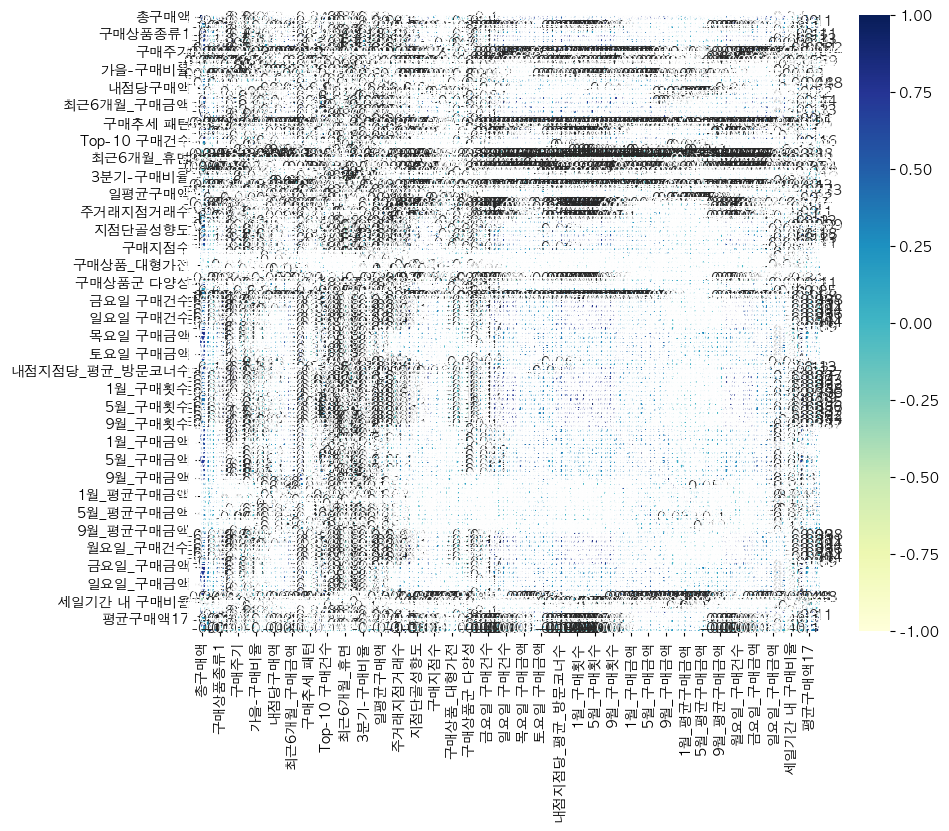

In [71]:
# 상관계수(-1 ~ +1)를 통해 feature 간의 유사성을 파악 
plt.figure(figsize=(10,8))
sns.heatmap(features.iloc[:,1:].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [86]:
# 범주형 변수와 수치형 변수를 분리
cat_features = features.select_dtypes(include=['object']).columns.to_list()
num_features = features.select_dtypes(exclude=['object']).columns.to_list()
#num_features = [c for c in features.columns.tolist() if c not in cat_features]  

In [50]:
features

,cust_id,구매추세 패턴,고가상품구매건수
0,0,12.07197,1.00000
1,1,37.26929,NaN
2,2,145.33639,NaN
3,3,13.64120,NaN
4,4,185.20259,1.00000
...,...,...,...
3495,3495,86.97413,NaN
3496,3496,62.72978,NaN
3497,3497,NaN,NaN
3498,3498,45.96194,NaN


In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [88]:
num_features = num_features[1:]

In [101]:
scaler = MinMaxScaler()
scaler.fit(features[num_features])
features_num = scaler.transform(features[num_features])
features_num_df = pd.DataFrame(features_num, columns=num_features)
features_num_df

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,구매추세 패턴,고가상품구매건수,고가상품구매율,Top-10 구매금액,Top-10 구매건수,SS-구매비율,FW-구매비율,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,세일기간 내 구매비율,비세일기간 내 구매비율,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17
0,0.05081,0.03925,0.02492,0.02009,0.15247,0.25472,0.44444,0.06338,0.10241,0.52703,0.09459,0.39189,0.37838,0.13514,0.01216,0.02985,0.04192,0.13730,0.10334,0.04943,0.11850,0.04808,0.05081,0.03925,0.02754,0.01724,0.01351,0.08073,0.03577,0.48649,0.51351,0.00000,0.00000,0.47297,0.06757,0.10811,0.45946,0.36486,0.56801,0.01378,0.02706,0.13966,0.00001,0.00114,0.03616,0.00826,0.03967,0.81818,0.14286,0.16176,0.25472,0.44444,0.14286,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.54054,0.44444,0.00000,1.00000,1.00000,0.02857,0.02083,0.04255,0.02691,0.03166,0.05019,0.00559,0.14068,0.06431,0.18992,0.29795,0.18819,0.22920,0.15911,0.14286,0.25472,0.13990,0.06306,0.02395,0.05488,0.00699,0.00000,0.02312,0.00000,0.01852,0.02747,0.04762,0.04918,0.04425,0.22355,0.23953,0.20316,0.20606,0.03853,0.24755,0.35908,0.20955,0.24029,0.15559,0.26280,0.18709,0.12726,0.09523,0.04856,0.23916,0.20480,0.21502,0.64344,0.33775,0.41276,0.07167,0.38917,0.03473,0.02857,0.02083,0.04255,0.02691,0.03166,0.05019,0.00559,0.14068,0.06431,0.18992,0.29795,0.18819,0.22920,0.15911,0.55556,0.22973,0.58108,0.05081,0.03925,0.02492,0.02009,0.02492
1,0.02297,0.00108,0.02358,0.00723,0.00448,0.00943,0.02778,0.00352,0.00602,0.00000,0.00000,0.00000,1.00000,0.00000,0.00052,0.00000,0.02584,0.02372,0.07035,0.00380,0.08777,0.00160,0.02297,0.00108,0.08501,0.00000,0.00000,NaN,NaN,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.58174,0.00000,0.00787,0.00000,0.00195,0.00788,0.00054,0.00771,0.00650,0.00000,0.00000,0.00000,0.00943,0.02778,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.66667,0.02778,0.00000,0.81818,0.00000,0.00000,0.00694,0.00000,0.00448,0.00000,0.00000,0.00000,0.11265,0.06250,0.19876,0.29497,0.14421,0.19791,0.15188,0.00000,0.00943,0.01554,0.01351,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.19059,0.23527,0.18025,0.20434,0.03853,0.23736,0.35908,0.17363,0.22472,0.14072,0.24872,0.18102,0.12224,0.09270,0.04476,0.22823,0.20480,0.21239,0.64344,0.26472,0.40399,0.06924,0.38734,0.03359,0.00000,0.00694,0.00000,0.00448,0.00000,0.00000,0.00000,0.11265,0.06250,0.19876,0.29497,0.14421,0.19791,0.15188,0.66667,0.00000,0.00000,0.02297,0.00108,0.02358,0.00723,0.02358
2,0.02341,0.00161,0.02413,0.00653,0.00000,0.00943,0.02778,0.00352,0.00602,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,0.02922,0.04743,NaN,NaN,NaN,NaN,0.02341,0.00161,0.33151,0.00000,0.00000,0.05069,0.00072,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.58273,0.04018,0.01034,0.04743,0.00042,0.00483,0.00162,0.00505,0.01951,0.00000,0.00000,0.00000,0.00943,0.02778,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,0.02778,0.00000,0.00000,0.00000,0.00000,0.00000,0.00709,0.00897,0.00000,0.00000,0.00000,0.11265,0.06069,0.20175,0.29691,0.14421,0.19

In [102]:
scaler = StandardScaler()
scaler.fit(features[num_features])
features_num = scaler.transform(features[num_features])
features_num_df = pd.DataFrame(features_num, columns=num_features)
features_num_df

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,구매추세 패턴,고가상품구매건수,고가상품구매율,Top-10 구매금액,Top-10 구매건수,SS-구매비율,FW-구매비율,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,세일기간 내 구매비율,비세일기간 내 구매비율,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17
0,-0.14458,0.06065,-0.29039,-0.26261,0.44978,0.53144,0.88888,-0.00934,-0.15996,0.75862,-0.62314,0.68942,0.55737,-0.46018,-0.36291,-0.26703,-0.19215,0.55425,-0.16805,0.04209,-0.19551,0.22389,-0.14458,0.06065,-0.93596,-0.28550,-0.34307,-0.02405,-0.01627,-0.03181,0.03181,-0.65733,-0.50758,-0.75862,-0.66119,-0.57551,1.03193,0.42852,-0.12930,-0.03490,-0.16688,0.56968,-0.15132,-0.25032,0.06690,-0.28533,-0.00469,0.92014,0.69415,0.16067,0.53144,0.88888,0.69415,0.89933,-0.14389,-0.17150,-0.04786,-0.25265,-0.01691,-0.35453,0.88888,-0.40309,0.68852,1.96669,-0.10688,-0.14323,0.14046,-0.08573,0.13851,0.61048,-0.34521,-0.01284,-0.26578,-0.58153,-0.24992,0.37906,0.05880,-0.25174,0.69415,0.53144,0.08714,0.67197,-0.15169,0.23407,-0.39116,-0.43101,-0.09581,-0.46427,-0.19515,-0.03196,0.42494,0.44152,0.38500,0.38835,-0.28582,0.01384,-0.30762,-0.26167,-0.15280,-0.38741,0.42092,-0.09586,-0.16503,0.05488,-0.29413,-0.04928,-0.16847,-0.08973,-0.12795,-0.28268,-0.03897,-0.35443,1.38819,-0.01090,-0.18371,-0.08113,-0.23054,-0.10688,-0.14323,0.14046,-0.08573,0.13851,0.61048,-0.34521,-0.01284,-0.26578,-0.58153,-0.24992,0.37906,0.05880,-0.25174,0.17408,-0.47437,0.11415,-0.14458,0.06065,-0.29039,-0.26261,-0.29039
1,-0.54919,-0.49762,-0.33102,-0.54797,-0.73372,-0.87715,-1.01299,-0.63500,-0.80655,-1.06053,-0.95534,-0.92130,3.06110,-0.94344,-0.50118,-0.58310,-0.55562,-0.69817,-0.61555,-0.57713,-0.61613,-0.55227,-0.54919,-0.49762,-0.50392,-0.48697,-0.43262,NaN,NaN,-1.62647,1.62647,-0.65733,-0.50758,1.06053,-0.89079,-0.96741,-0.92808,2.87088,0.22712,-0.61245,-0.56640,-0.95698,-0.08718,-0.04953,-0.48562,-0.29945,-0.49923,-1.19800,-0.61698,-1.01446,-0.87715,-1.01299,-0.61698,-1.11195,-0.14389,-0.17150,-0.04786,-0.25265,-0.01691,0.12314,-1.01299,-0.40309,0.09730,-0.50847,-0.49420,-0.34757,-0.44277,-0.39036,-0.44160,-0.42166,-0.43957,-0.43290,-0.32073,-0.42346,-0.33782,-0.39486,-0.42561,-0.39639,-0.61698,-0.87715,-0.79664,-0.23632,-0.48161,-0.47129,-0.47753,-0.43101,-0.44063,-0.46427,-0.44539,-0.44475,-0.45677,-0.42676,-0.44674,-0.31170,-0.37832,-0.38724,-0.34693,-0.26167,-0.38433,-0.38741,-0.38958,-0.38526,-0.38729,-0.33314,-0.38773,-0.18190,-0.27106,-0.25015,-0.33447,-0.28268,-0.20048,-0.35443,-0.40978,-0.34417,-0.26963,-0.18281,-0.27014,-0.49420,-0.34757,-0.44277,-0.39036,-0.44160,-0.42166,-0.43957,-0.43290,-0.32073,-0.42346,-0.33782,-0.39486,-0.42561,-0.39639,0.52223,-1.25358,-1.81830,-0.54919,-0.49762,-0.33102,-0.54797,-0.33102
2,-0.54270,-0.48976,-0.31420,-0.56350,-0.76958,-0.87715,-1.01299,-0.63500,-0.80655,-1.06053,-0.95534,-0.92130,-0.96664,2.63272,NaN,NaN,-0.47928,-0.43667,NaN,NaN,NaN,NaN,-0.54270,-0.48976,1.34902,-0.48697,-0.43262,-0.46746,-0.46699,-1.62647,1.62647,1.52131,1.97014,1.06053,2.50731,-0.96741,-0.92808,-0.97454,0.25275,1.07208,-0.51498,-0.43849,-0.13773,-0.14060,-0.46888,-0.367

In [104]:
scaler = RobustScaler()
scaler.fit(features[num_features])
features_num = scaler.transform(features[num_features])
features_num_df = pd.DataFrame(features_num, columns=num_features)
features_num_df

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,구매추세 패턴,고가상품구매건수,고가상품구매율,Top-10 구매금액,Top-10 구매건수,SS-구매비율,FW-구매비율,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,세일기간 내 구매비율,비세일기간 내 구매비율,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17
0,0.39367,0.81538,-0.15741,0.07104,0.79310,0.64000,0.69231,0.47826,0.16667,0.64175,-0.33574,0.58943,0.50260,-0.20804,-0.02434,0.25000,0.09926,0.91399,0.26119,0.57692,0.23038,0.93333,0.39367,0.81538,-0.56739,0.00000,0.15963,0.67170,0.76087,-0.03977,0.03977,0.00000,0.00000,-0.64175,-0.35101,-0.30505,0.83032,0.40965,-2.54437,0.27147,0.12880,0.93248,-0.06553,-0.11867,0.87719,-0.12028,0.54706,0.44444,1.00000,0.22288,0.64000,0.69231,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.25151,0.69231,0.00000,0.00000,1.00000,0.50000,0.44444,1.11111,0.68966,1.11111,2.27273,0.00000,0.90454,0.23457,-0.50769,0.27337,2.29762,1.06833,0.31231,1.00000,0.64000,0.40000,1.85714,0.50000,1.14286,0.00000,0.00000,0.60000,-0.16667,0.33333,1.00000,1.57143,2.00000,1.66667,2.12537,0.27161,1.18666,0.11570,0.00000,0.68188,-0.03737,2.14966,0.86147,0.61526,1.65546,0.32001,0.95431,0.47542,0.89042,0.80096,0.00000,0.98441,-0.05217,4.39117,1.00347,0.36973,0.95010,0.19443,0.50000,0.44444,1.11111,0.68966,1.11111,2.27273,0.00000,0.90454,0.23457,-0.50769,0.27337,2.29762,1.06833,0.31231,0.10000,-0.31081,0.07799,0.39367,0.81538,-0.15741,0.07104,-0.15741
1,-0.25635,-0.27692,-0.25160,-0.38337,-0.34483,-0.40000,-0.46154,-0.26087,-0.50000,-0.60806,-0.60547,-0.59486,2.34692,-0.60955,-0.32441,-0.25000,-0.42696,-0.48780,-0.34088,-0.34615,-0.32705,-0.35556,-0.25635,-0.27692,-0.16109,-0.33333,-0.04308,NaN,NaN,-1.47167,1.47167,0.00000,0.00000,0.60806,-0.55371,-0.61857,-0.58626,2.17391,-0.14276,-0.73088,-0.42360,-0.77170,5.02128,0.77480,-0.28070,-0.14935,-0.35294,-0.55556,0.00000,-0.48889,-0.40000,-0.46154,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06743,-0.46154,0.00000,-0.50000,0.00000,-0.25000,0.00000,-0.22222,0.00000,-0.22222,-0.18182,-0.22222,-0.11777,0.08750,-0.09238,-0.00218,-0.04902,-0.09227,-0.08002,0.00000,-0.40000,-0.40000,0.28571,-0.16667,-0.14286,-0.16667,0.00000,-0.20000,-0.16667,-0.16667,0.00000,-0.14286,0.00000,0.00000,0.23484,-0.01651,-0.01521,-0.02680,0.00000,0.00000,-0.03737,-0.00899,0.00000,0.00000,0.00000,0.00000,0.52457,-0.03606,-0.02855,-0.05006,0.00000,0.00000,-0.05217,-0.01778,0.00000,0.00000,0.00000,0.00000,-0.25000,0.00000,-0.22222,0.00000,-0.22222,-0.18182,-0.22222,-0.11777,0.08750,-0.09238,-0.00218,-0.04902,-0.09227,-0.08002,0.30000,-1.00000,-1.69753,-0.25635,-0.27692,-0.25160,-0.38337,-0.25160
2,-0.24593,-0.26154,-0.21260,-0.40811,-0.37931,-0.40000,-0.46154,-0.26087,-0.50000,-0.60806,-0.60547,-0.59486,-0.62002,2.36167,NaN,NaN,-0.31644,-0.19512,NaN,NaN,NaN,NaN,-0.24593,-0.26154,1.58147,-0.33333,-0.04308,-0.25681,-0.30435,-1.47167,1.47167,1.00000,1.00000,0.60806,2.44629,-0.61857,-0.58626,-0.60386,0.02997,2.19265,-0.35251,-0.19293,1.01277,0.36956,-0.24561,-0.28946,0.00000,-0.55556,0.00000,-0.48889,-0.40000,-0.46154,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,

In [103]:
scaler = MaxAbsScaler()
scaler.fit(features[num_features])
features_num = scaler.transform(features[num_features])
features_num_df = pd.DataFrame(features_num, columns=num_features)
features_num_df

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,주말방문비율,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,최근3개월_구매금액,최근3개월_구매건수,최근6개월_구매금액,최근6개월_구매건수,최근12개월_구매금액,최근12개월_구매건수,구매추세 패턴,고가상품구매건수,고가상품구매율,Top-10 구매금액,Top-10 구매건수,SS-구매비율,FW-구매비율,최근3개월_휴면,최근6개월_휴면,평일방문비율,1분기-구매비율,2분기-구매비율,3분기-구매비율,4분기-구매비율,최소구매액(반품포함),평균구매상품수,일평균구매액,일평균구매건,최소구매액,중간구매액,주거래지점거래수,월평균구매금액,월평균구매건수,거래개월수,지점단골성향도,브랜드단골성향도,구매상품군다양성,구매브랜드다양성,구매지점수,MVG여부,구매상품_골프,구매상품_명품,구매상품_대형가전,구매상품_디자이너,구매상품_보석,중위가격초과상품구매율,구매상품군 다양성,지점대분류수,선호월,주말방문횟수,금요일 구매건수,목요일 구매건수,수요일 구매건수,월요일 구매건수,일요일 구매건수,토요일 구매건수,화요일 구매건수,금요일 구매금액,목요일 구매금액,수요일 구매금액,월요일 구매금액,일요일 구매금액,토요일 구매금액,화요일 구매금액,내점지점수,내점코너수,내점지점당_평균_방문코너수,10월_구매횟수,11월_구매횟수,12월_구매횟수,1월_구매횟수,2월_구매횟수,3월_구매횟수,4월_구매횟수,5월_구매횟수,6월_구매횟수,7월_구매횟수,8월_구매횟수,9월_구매횟수,10월_구매금액,11월_구매금액,12월_구매금액,1월_구매금액,2월_구매금액,3월_구매금액,4월_구매금액,5월_구매금액,6월_구매금액,7월_구매금액,8월_구매금액,9월_구매금액,10월_평균구매금액,11월_평균구매금액,12월_평균구매금액,1월_평균구매금액,2월_평균구매금액,3월_평균구매금액,4월_평균구매금액,5월_평균구매금액,6월_평균구매금액,7월_평균구매금액,8월_평균구매금액,9월_평균구매금액,금요일_구매건수,목요일_구매건수,수요일_구매건수,월요일_구매건수,일요일_구매건수,토요일_구매건수,화요일_구매건수,금요일_구매금액,목요일_구매금액,수요일_구매금액,월요일_구매금액,일요일_구매금액,토요일_구매금액,화요일_구매금액,고객등급,세일기간 내 구매비율,비세일기간 내 구매비율,총구매액17,구매건수17,평균구매액17,최대구매액17,가격선호도17
0,0.02939,0.03976,0.00599,0.01594,0.15625,0.26168,0.45946,0.06667,0.10241,0.52703,0.09459,0.39189,0.37838,0.13514,0.01217,0.04412,0.02332,0.17637,0.03819,0.05123,0.03540,0.04884,0.02939,0.03976,0.02754,0.01724,0.01351,0.03174,0.03645,0.48649,0.51351,0.00000,0.00000,0.47297,0.06757,0.10811,0.45946,0.36486,-0.02496,0.02681,0.02709,0.17862,0.00001,0.00116,0.03668,0.00829,0.04588,0.83333,0.25000,0.32941,0.26168,0.45946,0.25000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.54054,0.45946,0.33333,1.00000,1.00000,0.02857,0.02083,0.04255,0.02691,0.03166,0.05019,0.00559,0.03158,0.00385,-0.01103,0.00479,0.05140,0.03901,0.00852,0.25000,0.26168,0.14433,0.06306,0.02395,0.05488,0.00699,0.00000,0.02312,0.00000,0.01852,0.02747,0.04762,0.04918,0.04425,0.04613,0.00557,0.02795,0.00217,0.00000,0.01335,0.00000,0.04347,0.02007,0.01731,0.01875,0.00742,0.01319,0.00278,0.00397,0.01416,0.00000,0.00334,0.00000,0.09932,0.01470,0.00261,0.00298,0.00118,0.02857,0.02083,0.04255,0.02691,0.03166,0.05019,0.00559,0.03158,0.00385,-0.01103,0.00479,0.05140,0.03901,0.00852,0.60000,0.22973,0.58108,0.02939,0.03976,0.00599,0.01594,0.00599
1,0.00092,0.00161,0.00462,0.00302,0.00893,0.01869,0.05405,0.00702,0.00602,0.00000,0.00000,0.00000,1.00000,0.00000,0.00053,0.01471,0.00693,0.06792,0.00280,0.00569,0.00177,0.00240,0.00092,0.00161,0.08501,0.00000,0.00000,NaN,NaN,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,-0.00140,0.01322,0.00790,0.04528,0.00195,0.00790,0.00108,0.00774,0.01292,0.08333,0.12500,0.20000,0.01869,0.05405,0.12500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.66667,0.05405,0.33333,0.83333,0.00000,0.00000,0.00694,0.00000,0.00448,0.00000,0.00000,0.00000,0.00000,0.00193,0.00000,0.00058,0.00000,0.00000,0.00000,0.12500,0.01869,0.02062,0.01351,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00564,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00753,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00694,0.00000,0.00448,0.00000,0.00000,0.00000,0.00000,0.00193,0.00000,0.00058,0.00000,0.00000,0.00000,0.70000,0.00000,0.00000,0.00092,0.00161,0.00462,0.00302,0.00462
2,0.00138,0.00215,0.00519,0.00232,0.00446,0.01869,0.05405,0.00702,0.00602,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,0.01037,0.09057,NaN,NaN,NaN,NaN,0.00138,0.00215,0.33151,0.00000,0.00000,0.00010,0.00143,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00030,0.05286,0.01037,0.09057,0.00042,0.00485,0.00216,0.00508,0.02585,0.08333,0.12500,0.20000,0.01869,0.05405,0.12500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,0.05405,0.33333,0.08333,0.00000,0.00000,0.00000,0.00709,0.00897,0.00000,0.00000,0.00000,0.00000,0.00000,0.00374,0.00332,0.00000,